In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

df = pd.read_csv("/kaggle/input/newdata/NEWDATA.csv")

df = df.head(200)
df.head()


,Unnamed: 0.1,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


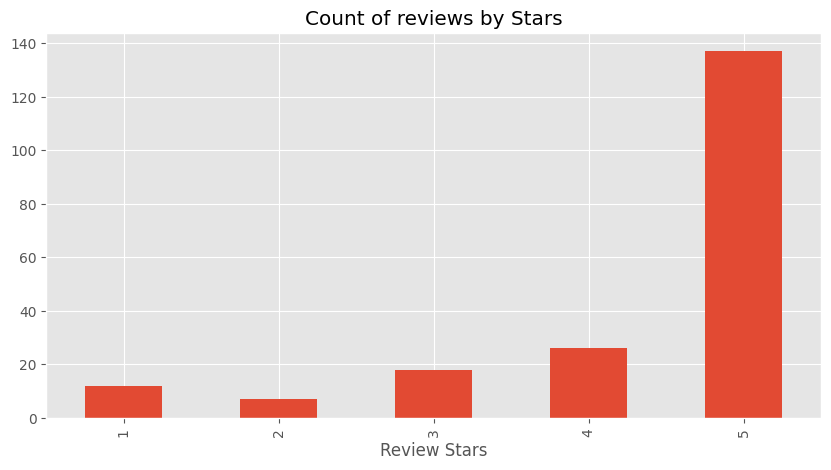

In [40]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title='Count of reviews by Stars',figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

In [41]:
## Basic NLTK


In [42]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [43]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [44]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [45]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [46]:
# Vader Sentiment scoring - Each word is scored and then score is counted

# **Vaders Model**


**Vader Sentiment scoring - Each word is scored and then score is counted**

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [48]:
sia

In [49]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [50]:
sia.polarity_scores('I am feeling so hungry and feels like crying')

{'neg': 0.256, 'neu': 0.413, 'pos': 0.331, 'compound': -0.0258}

In [51]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [52]:
# Run the polarity score on entire data set
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/200 [00:00<?, ?it/s]

In [53]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how ='left')

In [54]:
# Now we have sentiment score and metaData
vaders.head()

,Id,neg,neu,pos,compound,Unnamed: 0.1,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot Vaders results

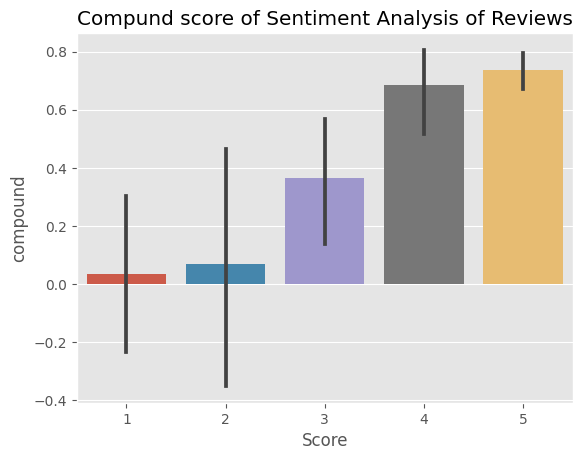

In [55]:
ax = sns.barplot(data=vaders, x = 'Score', y = 'compound')
ax.set_title("Compund score of Sentiment Analysis of Reviews")
plt.show()

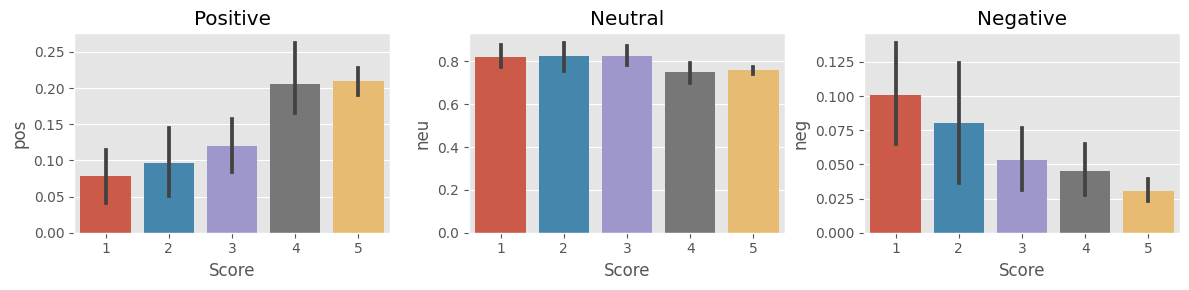

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax=axs[0])
sns.barplot(data=vaders, x = 'Score', y = 'neu', ax=axs[1])
sns.barplot(data=vaders, x = 'Score', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **Roberta Pretained Model**

**It accounts for words but for context also**

In [57]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [58]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import os

# Assuming the dataset is downloaded and unzipped to /kaggle/working/twitter-roberta-base-sentiment
MODEL_PATH = "/kaggle/input/twitter"

# Verify that the directory contains the necessary files

# Load the tokenizer and model from the local directory
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)

def preprocess(text, max_length=128):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
    return encoded_input

def predict_sentiment(text, max_length=128):
    encoded_input = preprocess(text, max_length=max_length)
    with torch.no_grad():
        output = model(**encoded_input)
    scores = output.logits[0].detach().numpy()
    scores = torch.nn.functional.softmax(torch.tensor(scores), dim=-1).numpy()
    return scores

# Example usage
text = "This product is fantastic!"
sentiment_scores = predict_sentiment(text)
print(sentiment_scores)



[0.00169723 0.00758056 0.9907222 ]


In [59]:
# vaders results example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [60]:
# Run for roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [61]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

In [ ]:
results_df.columns

# Compare Results between Both Models****

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with pd.option_context('mode.use_inf_as_na', True):
    sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
                                        'roberta_neg', 'roberta_neu', 'roberta_pos'], 
                                        hue='Score', palette='tab10')

plt.show()

# Review Examples****

**Positive 1* and negative 5***

In [ ]:
results_df.query('Score==1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==1').sort_values('vader_pos', ascending=False)['Text'].values[0]

**Negative Sentiment 5* review**

In [ ]:
results_df.query('Score==5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score==5').sort_values('vader_neg', ascending=False)['Text'].values[0]

In [ ]:
# Check Model Here> ****

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame

def queryVaders(text):
    vscore = sia.polarity_scores(text)
    vscore_dict  = {
        'Negative' : vscore['neg'],
        'Neutral' : vscore['neu'],
        'Positive' : vscore['pos']
    }
    
    print(vscore_dict)
    df = pd.DataFrame(list(vscore_dict.items()), columns=['Emotion', 'Score'])

    # Create the bar plot
    ax = sns.barplot(data=df, x='Emotion', y='Score')
    ax.set_title("Compound Score of Sentiment Analysis of Reviews")

    # Show the plot
    plt.show()


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame

def queryRoberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
    
    }
    print(scores_dict)
    df = pd.DataFrame(list(scores_dict.items()), columns=['Emotion', 'Score'])

    # Create the bar plot
    ax = sns.barplot(data=df, x='Emotion', y='Score')
    ax.set_title("Compound Score of Sentiment Analysis of Reviews")

    # Show the plot
    plt.show()

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame

def query(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    vscore = sia.polarity_scores(text)
    
    scores_dict = {
        'V-Negative' : vscore['neg'],
        'V-Neutral' : vscore['neu'],
        'V-Positive' : vscore['pos'],
        'R-Negative' : scores[0],
        'R-Neutral' : scores[1],
        'R-Positive' : scores[2]
    
    }
   
    df = pd.DataFrame(list(scores_dict.items()), columns=['Emotion', 'Score'])

    # Create the bar plot
    ax = sns.barplot(data=df, x='Emotion', y='Score')
    ax.set_title("Compound Score of Sentiment Analysis of Reviews")

    
    # Show the plot
    plt.show()


In [ ]:
text = "My project is good"
queryVaders(text)
queryRoberta(text)

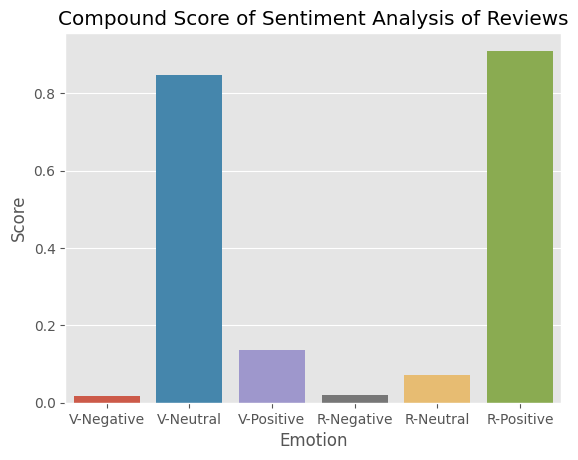

In [63]:
query(text)